In [15]:
import pandas as pd
import numpy as np

import matplotlib as mpl 

## agg backend is used to create plot as a .png file
mpl.use('agg')

import matplotlib.pyplot as plt 


In [40]:
ga_stats_results_BERT = "ga_results_BERT_STATS.csv"
ga_stats_results_DISTANCE = "ga_results_DISTANCE_STATS.csv"
ga_stats_results_DISTANCE_BERT = "ga_results_DISTANCE_BERT_STATS.csv"

bert_stats = pd.read_csv('ga_attack_results/'+ga_stats_results_BERT)
distance_stats = pd.read_csv('ga_attack_results/'+ga_stats_results_DISTANCE)
bert_distance_stats = pd.read_csv('ga_attack_results/'+ga_stats_results_DISTANCE_BERT)


In [41]:
bert_stats.head()

,sentiment,text,probs,ga_sentiment,ga_text,ga_probs,ga_num_changes,ga_lev_ratio,ga_flipped_sentiment,ga_percent_change,ga_generations,ga_time_taken
0,0,well i must say this is probably the worst fil...,0.025771,1,well i must say this is probably the best film...,0.812936,5,0.966937,Y,0.03,1,42
1,1,if christopher nolan had made memento before f...,0.769358,0,if christopher nolan had made memento before f...,0.398513,8,0.968591,Y,0.03,2,87
2,1,i'm not saying anything new when i say that ra...,0.807952,0,i'm not saying anything new when i say that ra...,0.484280,5,0.977343,Y,0.03,1,43
3,0,i have been watching lost with my family since...,0.476023,1,i have been watching lost with my family since...,0.672474,4,0.979098,Y,0.01,1,44
4,1,caught this flick as one of a fivefor deal fro...,0.942861,0,caught this flick as one of a fivefor deal fro...,0.456993,8,0.959369,Y,0.05,2,84


In [42]:
distance_stats.head()

,sentiment,text,probs,ga_sentiment,ga_text,ga_probs,ga_num_changes,ga_lev_ratio,ga_flipped_sentiment,ga_percent_change,ga_generations,ga_time_taken
0,0,well i must say this is probably the worst fil...,0.025771,1,well i must say this is arguably the meanest f...,0.762060,13,0.934823,Y,0.08,3,97
1,1,if christopher nolan had made memento before f...,0.769358,0,if christopher nolan had made memento before f...,0.448427,5,0.974665,Y,0.02,1,33
2,1,i'm not saying anything new when i say that ra...,0.807952,0,i'm not saying anything new when i tell that r...,0.392656,7,0.970754,Y,0.04,2,59
3,0,i have been watching lost with my family since...,0.476023,1,i have been watching lost with my family since...,0.799918,2,0.978627,Y,0.01,1,32
4,1,caught this flick as one of a fivefor deal fro...,0.942861,0,caught this flick as somebody of a fivefor dea...,0.463923,9,0.955224,Y,0.06,2,64


# box plots for time taken 

In [43]:
bert_distance_stats.head()

,sentiment,text,probs,ga_sentiment,ga_text,ga_probs,ga_num_changes,ga_lev_ratio,ga_flipped_sentiment,ga_percent_change,ga_generations,ga_time_taken
0,0,well i must say this is probably the worst fil...,0.025771,1,well i must say this is probably the meanest f...,0.768538,20,0.895522,Y,0.13,5,264
1,1,if christopher nolan had made memento before f...,0.769358,0,if christopher nolan had made memento before f...,0.395876,10,0.966031,Y,0.03,2,107
2,1,i'm not saying anything new when i say that ra...,0.807952,0,i'm not saying somethings newer when i say tha...,0.426562,10,0.958418,Y,0.05,2,106
3,0,i have been watching lost with my family since...,0.476023,1,i have been watching lost with my family since...,0.637239,5,0.978884,Y,0.01,1,53
4,1,caught this flick as one of a fivefor deal fro...,0.942861,0,caught this flick as anyone of a fivefor addre...,0.294813,29,0.836257,Y,0.19,5,256


# graphs

In [115]:
def time_boxplot(data_method_a, data_method_b, data_method_c, file_name):
    
    data = [data_method_a,data_method_b,data_method_c] 

    labels = ['Method A\nStandard Deviation\n' + str(np.std(distance_time)),'Method B\nStandard Deviation\n' + str(np.std(bert_time)),'Method C\nStandard Deviation\n' + str(np.std(bert_distance_time))]

    # Create a figure instance
    fig = plt.figure(1, figsize=(15, 12))

    # Create an axes instance
    axs = fig.add_subplot(111)

    axs.set_xticklabels(labels)

    box_plot = axs.boxplot(data, showmeans=True)

    h, l = axs.get_legend_handles_labels()
    h.append(box_plot.get('means')[0])
    h.append(box_plot.get('medians')[0])
    h.append(box_plot.get('fliers')[0])

    l = ['Mean', 'Median', 'Outliers']
    plt.rcParams["legend.loc"] = 'lower right'
    plt.legend(h, l)


    fig.savefig(file_name, bbox_inches='tight')
    plt.show()
    
    return
  

def method_scatterplot(x_axis, y_axis, file_name):
    rng = np.random.RandomState(0)
    fig = plt.figure(1, figsize=(15, 12))
    plt.xticks(range(len(x_axis)))

    plt.scatter(x_axis, y_axis,  alpha=0.3)

    fig.savefig(file_name, bbox_inches='tight')
    
    plt.show()

    return



# display boxplot for each method for time taken to run

<ipython-input-108-d67a257f7765>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(labels)


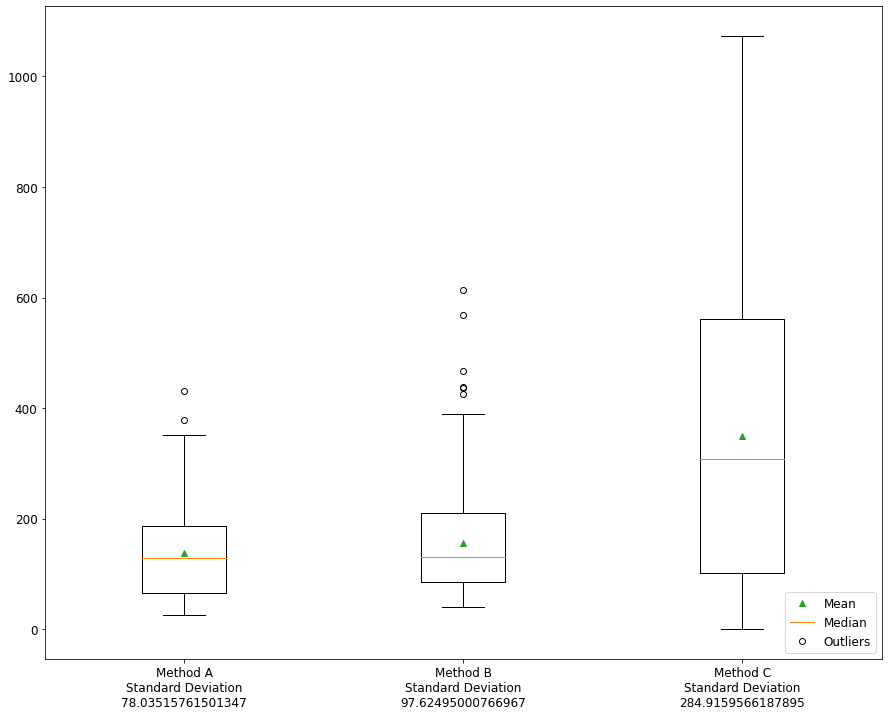

In [110]:
# box plot data
distance_time_box = distance_stats['ga_time_taken'] # method A
bert_time_box = bert_stats['ga_time_taken'] # method B
bert_distance_time_box = bert_distance_stats['ga_time_taken'] # method C
time_box_filename = 'ga_attack_results/box-plot-time.png'

# draw and save box plot
time_boxplot(distance_time,bert_time_box,bert_distance_time_box, time_box_filename)






# scatter plot for Method A

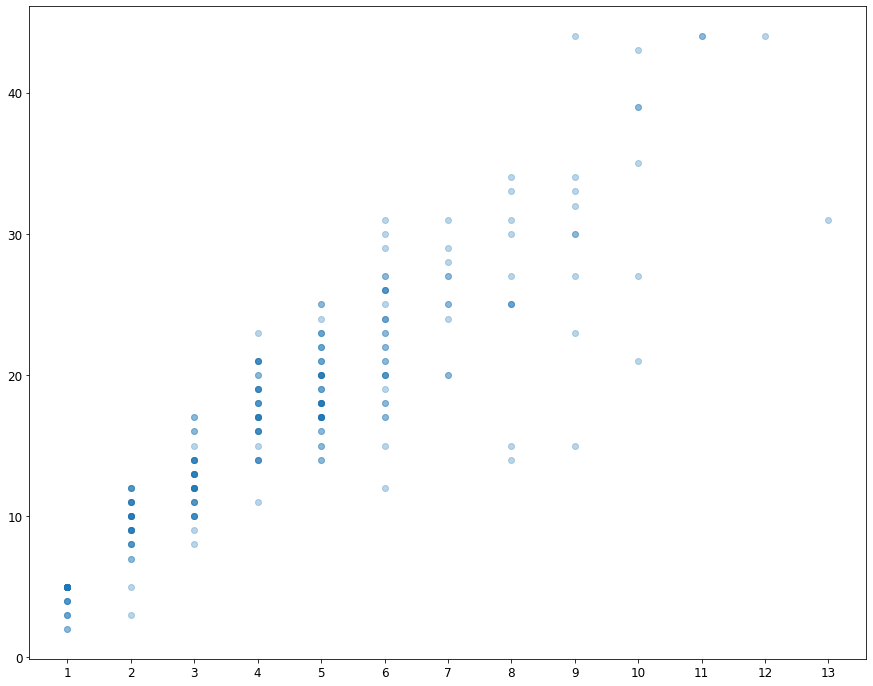

In [116]:

distance_time_box_scatter_gen = distance_stats['ga_generations']
distance_time_box_scatter = distance_stats['ga_num_changes']
scatter_plot_filename_a = 'ga_attack_results/scatter-plot-method_a.png'
method_scatterplot(distance_time_box_scatter_gen,distance_time_box_scatter,scatter_plot_filename_a)


# scatter plot for Method B

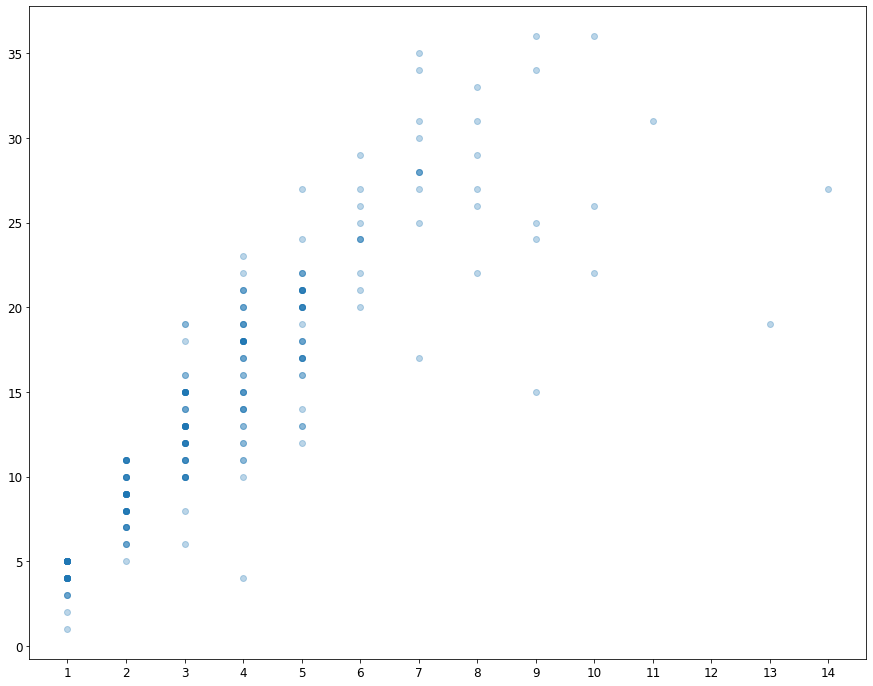

In [117]:

bert_time_box_scatter_gen = bert_stats['ga_generations']
bert_time_box_scatter = bert_stats['ga_num_changes']
scatter_plot_filename_b = 'ga_attack_results/scatter-plot-method_b.png'
method_scatterplot(bert_time_box_scatter_gen,bert_time_box_scatter,scatter_plot_filename_b)


# scatter plot for Method C

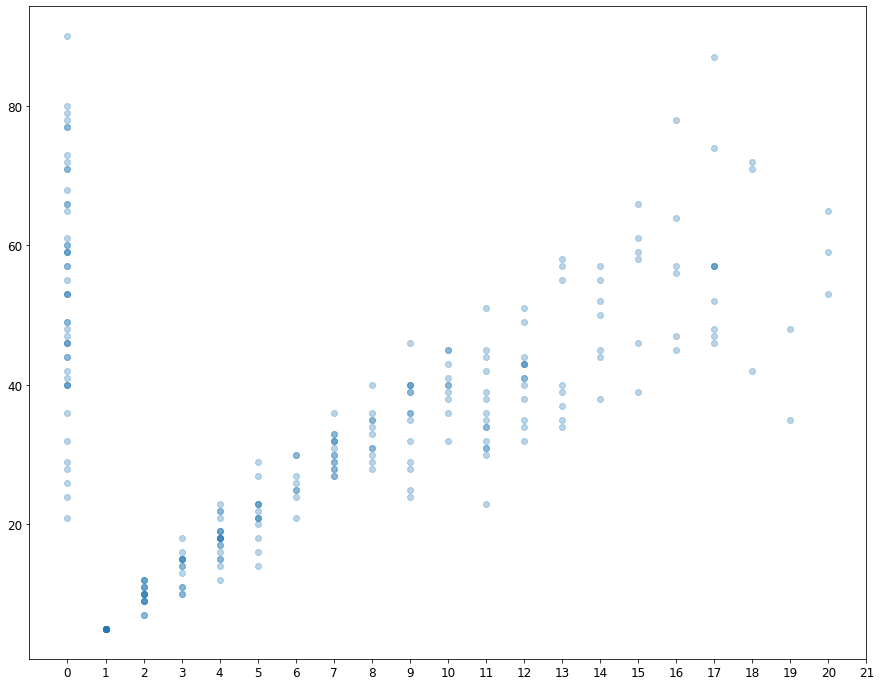

In [118]:

bert_distance_time_box_scatter_gen = bert_distance_stats['ga_generations']
bert_distance_time_box_scatter = bert_distance_stats['ga_num_changes']
scatter_plot_filename_c = 'ga_attack_results/scatter-plot-method_c.png'
method_scatterplot(bert_distance_time_box_scatter_gen,bert_distance_time_box_scatter,scatter_plot_filename_c)


In [82]:
distance_stats.head()

,sentiment,text,probs,ga_sentiment,ga_text,ga_probs,ga_num_changes,ga_lev_ratio,ga_flipped_sentiment,ga_percent_change,ga_generations,ga_time_taken
0,0,well i must say this is probably the worst fil...,0.025771,1,well i must say this is arguably the meanest f...,0.762060,13,0.934823,Y,0.08,3,97
1,1,if christopher nolan had made memento before f...,0.769358,0,if christopher nolan had made memento before f...,0.448427,5,0.974665,Y,0.02,1,33
2,1,i'm not saying anything new when i say that ra...,0.807952,0,i'm not saying anything new when i tell that r...,0.392656,7,0.970754,Y,0.04,2,59
3,0,i have been watching lost with my family since...,0.476023,1,i have been watching lost with my family since...,0.799918,2,0.978627,Y,0.01,1,32
4,1,caught this flick as one of a fivefor deal fro...,0.942861,0,caught this flick as somebody of a fivefor dea...,0.463923,9,0.955224,Y,0.06,2,64
